In [3]:
import pandas as pd
import sqlite3
import openpyxl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import silhouette_visualizer
import matplotlib.cm as cm
import sklearn.metrics as metrics



In [4]:
df = pd.read_csv("../Sample-Superstore.csv", sep = ",", encoding='windows-1252')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [6]:
df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.replace('-','')

In [7]:
df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [8]:
df_monetary = df.groupby('CustomerID')['Sales'].sum()
df_monetary = df_monetary.reset_index()

In [9]:
df_monetary.head()

,CustomerID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [10]:
df_freuquency = df.groupby('CustomerID')["OrderID"].count()
df_freuquency = df_freuquency.reset_index()
df_freuquency

,CustomerID,OrderID
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


In [11]:
df_Recency = df.groupby("CustomerID")["OrderDate"].max()
df_Recency = df_Recency.reset_index()
df_Recency

,CustomerID,OrderDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2016-11-10
...,...,...
788,XP-21865,2017-11-17
789,YC-21895,2017-12-26
790,YS-21880,2017-12-21
791,ZC-21910,2017-11-06


In [12]:
now = datetime.datetime.today()
now

datetime.datetime(2023, 3, 15, 21, 58, 25, 917594)

In [13]:
df1 = pd.merge(pd.merge(df_monetary, df_freuquency, on = "CustomerID"), df_Recency, on = "CustomerID")
df1

,CustomerID,Sales,OrderID,OrderDate
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
788,XP-21865,2374.658,28,2017-11-17
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21
791,ZC-21910,8025.707,31,2017-11-06


In [14]:
df1.rename(columns = {'Sales':'Amount', 'OrderID':'Frequency', 'OrderDate':'Recency'}, inplace = True)
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2017-06-29
1,AA-10375,1056.390,15,2017-12-11
2,AA-10480,1790.512,12,2017-04-15
3,AA-10645,5086.935,18,2017-11-05
4,AB-10015,886.156,6,2016-11-10
...,...,...,...,...
788,XP-21865,2374.658,28,2017-11-17
789,YC-21895,5454.350,8,2017-12-26
790,YS-21880,6720.444,12,2017-12-21
791,ZC-21910,8025.707,31,2017-11-06


In [15]:
df1["Recency"] = pd.to_datetime(df1["Recency"])

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerID  793 non-null    object        
 1   Amount      793 non-null    float64       
 2   Frequency   793 non-null    int64         
 3   Recency     793 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.0+ KB


In [17]:
df1["Recency"] = (now - df1["Recency"]).dt.days
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2085
1,AA-10375,1056.390,15,1920
2,AA-10480,1790.512,12,2160
3,AA-10645,5086.935,18,1956
4,AB-10015,886.156,6,2316
...,...,...,...,...
788,XP-21865,2374.658,28,1944
789,YC-21895,5454.350,8,1905
790,YS-21880,6720.444,12,1910
791,ZC-21910,8025.707,31,1955


In [18]:
df1.skew()

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\149261804.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.skew()


Amount       2.476555
Frequency    0.774907
Recency      2.276395
dtype: float64

In [19]:
df11 = df1.drop(["CustomerID"], axis = 1)

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\4048481646.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df11[i])
C:\Users\satom\AppData\Local\Temp\ipykernel_3572\4048481646.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df11[i])
C:\Users\satom\AppData\Local\Temp\ipykernel_3572\40484

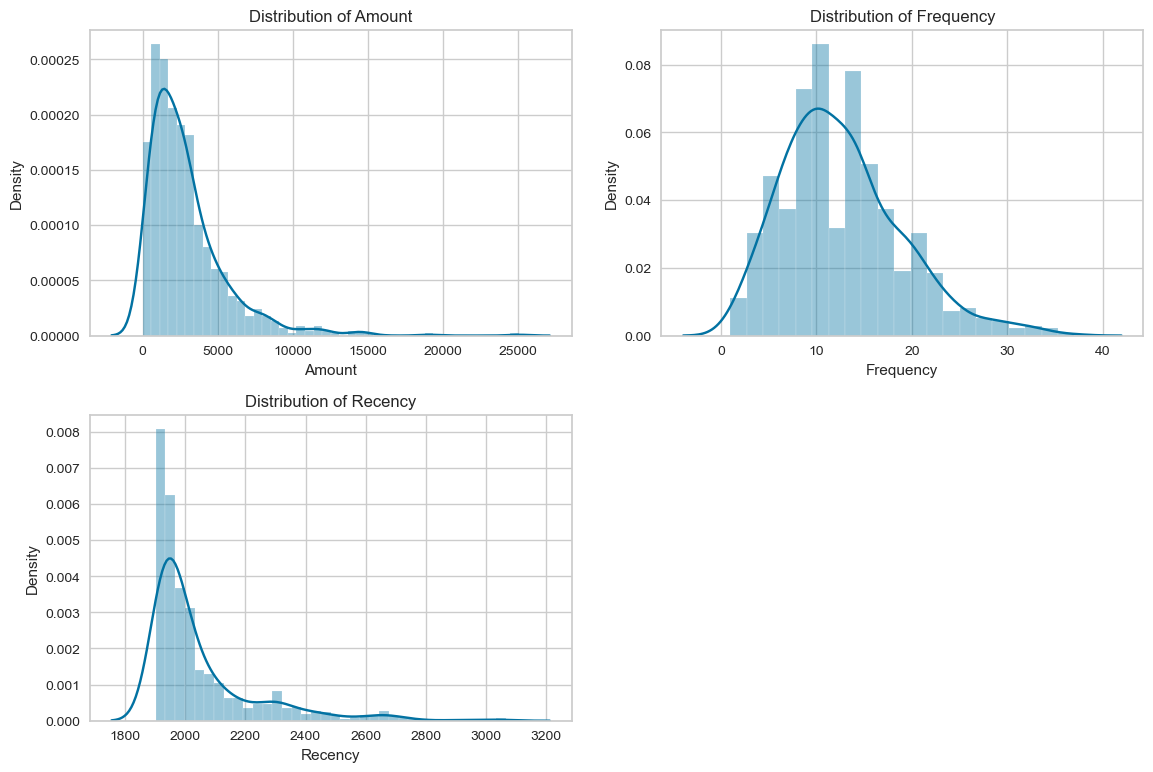

In [20]:
plt.figure(figsize=(12,8))
for index,i in enumerate(df11.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.distplot(df11[i])

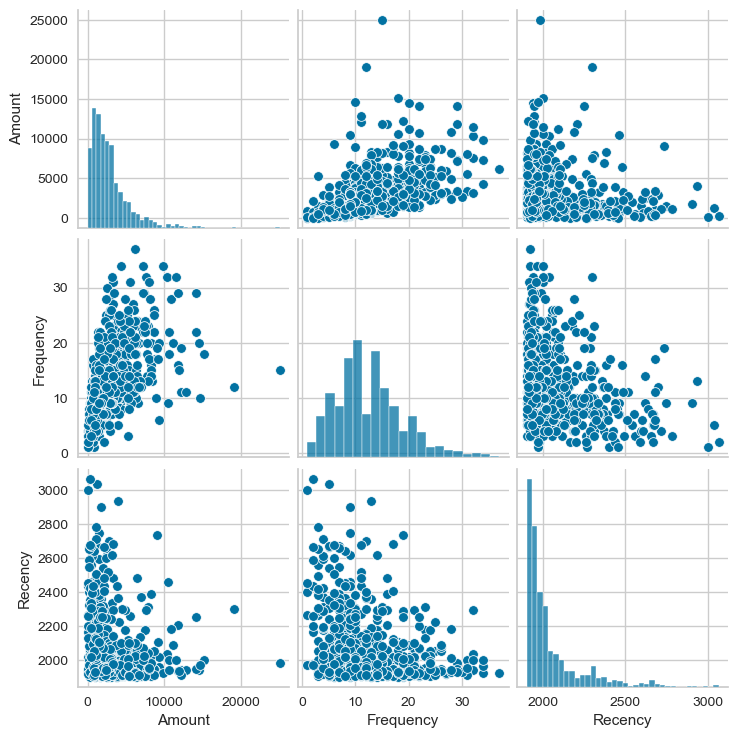

In [21]:
sns.pairplot(df11)
plt.show()

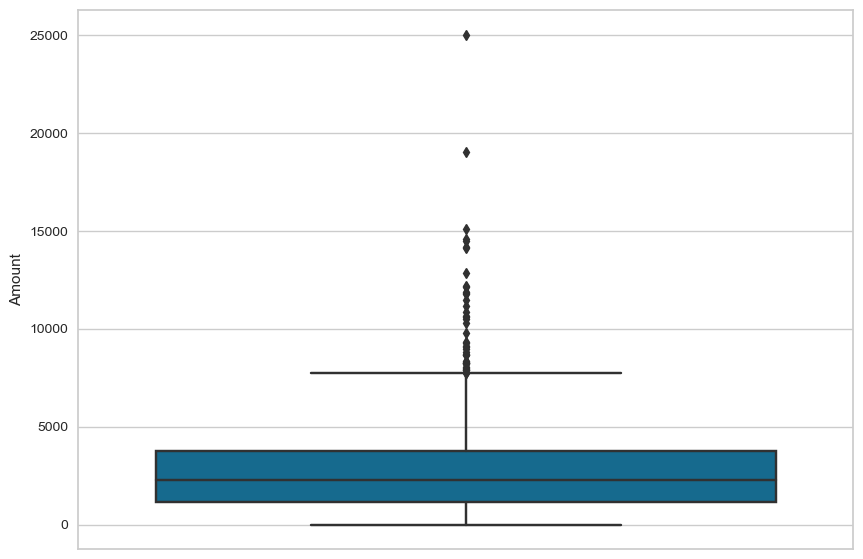

In [22]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Amount")
plt.show()

In [23]:
df1.head()

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2085
1,AA-10375,1056.390,15,1920
2,AA-10480,1790.512,12,2160
3,AA-10645,5086.935,18,1956
4,AB-10015,886.156,6,2316


remove outliers

In [24]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [25]:
df1 = remove_outlier(df1, "Amount")

In [26]:
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2085
1,AA-10375,1056.390,15,1920
2,AA-10480,1790.512,12,2160
3,AA-10645,5086.935,18,1956
4,AB-10015,886.156,6,2316
...,...,...,...,...
787,WB-21850,6160.102,37,1921
788,XP-21865,2374.658,28,1944
789,YC-21895,5454.350,8,1905
790,YS-21880,6720.444,12,1910


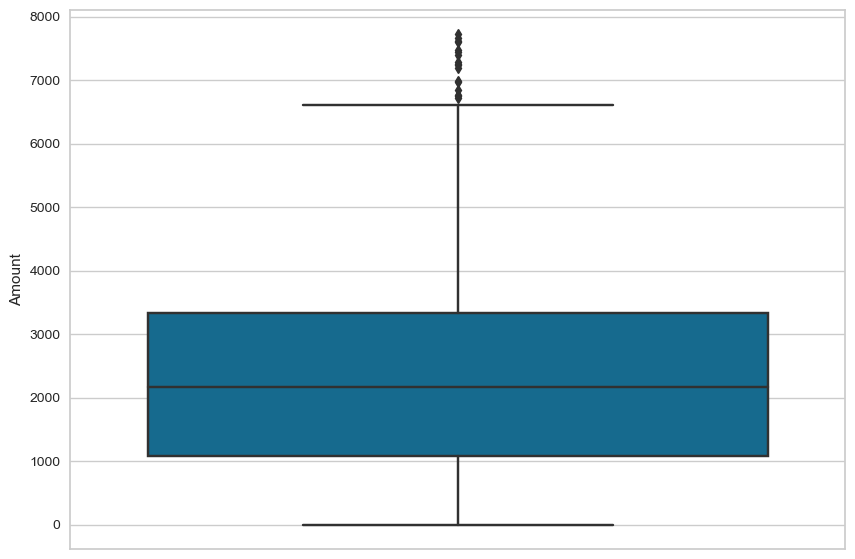

In [27]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Amount")
plt.show()

In [28]:
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2085
1,AA-10375,1056.390,15,1920
2,AA-10480,1790.512,12,2160
3,AA-10645,5086.935,18,1956
4,AB-10015,886.156,6,2316
...,...,...,...,...
787,WB-21850,6160.102,37,1921
788,XP-21865,2374.658,28,1944
789,YC-21895,5454.350,8,1905
790,YS-21880,6720.444,12,1910


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 792
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  750 non-null    object 
 1   Amount      750 non-null    float64
 2   Frequency   750 non-null    int64  
 3   Recency     750 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 29.3+ KB


In [30]:
df1 = remove_outlier(df1, "Frequency")

In [31]:
df1

,CustomerID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,2085
1,AA-10375,1056.390,15,1920
2,AA-10480,1790.512,12,2160
3,AA-10645,5086.935,18,1956
4,AB-10015,886.156,6,2316
...,...,...,...,...
785,VT-21700,1736.596,9,2901
786,VW-21775,6134.038,18,1929
789,YC-21895,5454.350,8,1905
790,YS-21880,6720.444,12,1910


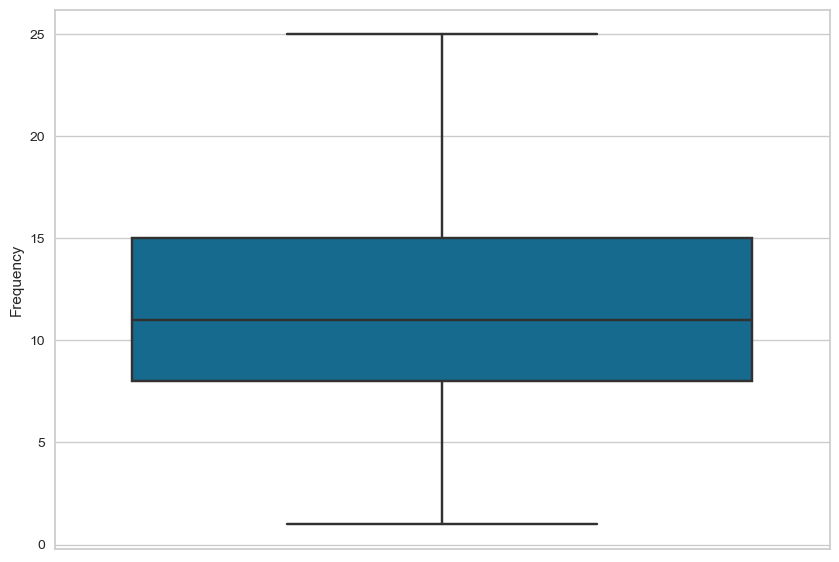

In [32]:
plt.figure(figsize= (10,7)) 
sns.boxplot(data = df1, y = "Frequency")
plt.show()

In [33]:
df12 = df1.drop(["CustomerID"], axis = 1)

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\1671390431.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df12[i])
C:\Users\satom\AppData\Local\Temp\ipykernel_3572\1671390431.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df12[i])
C:\Users\satom\AppData\Local\Temp\ipykernel_3572\16713

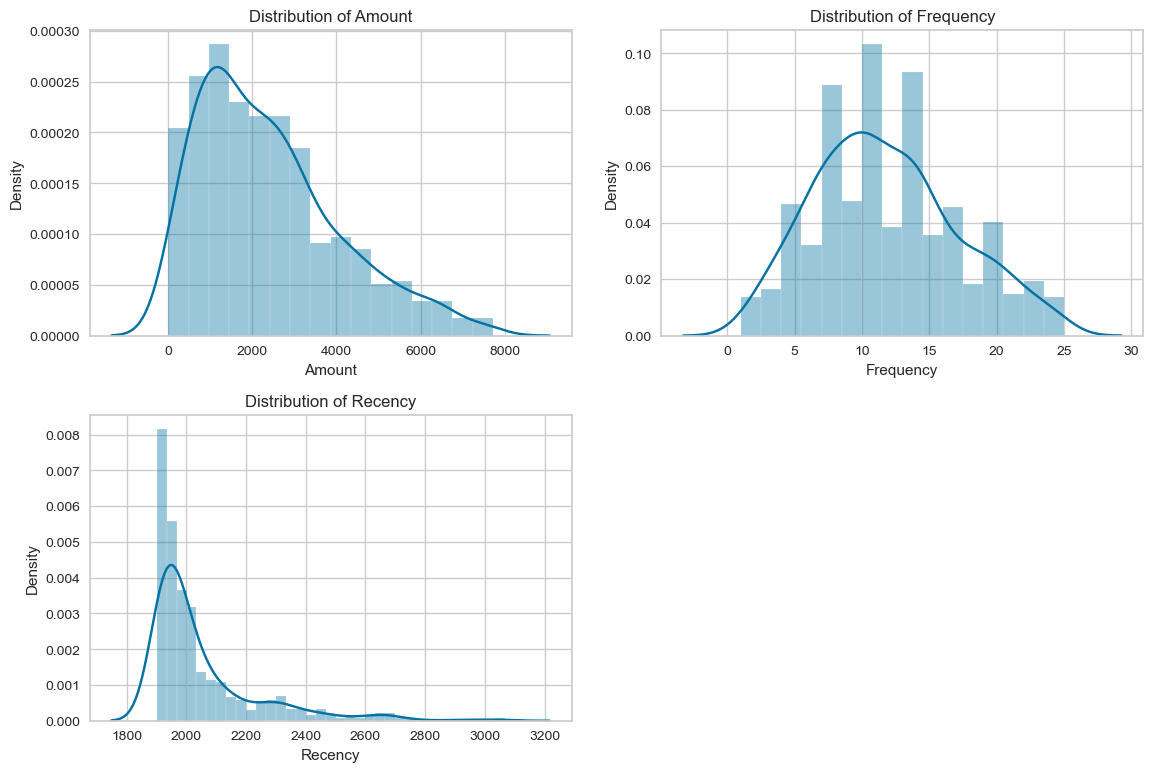

In [34]:
plt.figure(figsize=(12,8))
for index,i in enumerate(df12.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.distplot(df12[i])

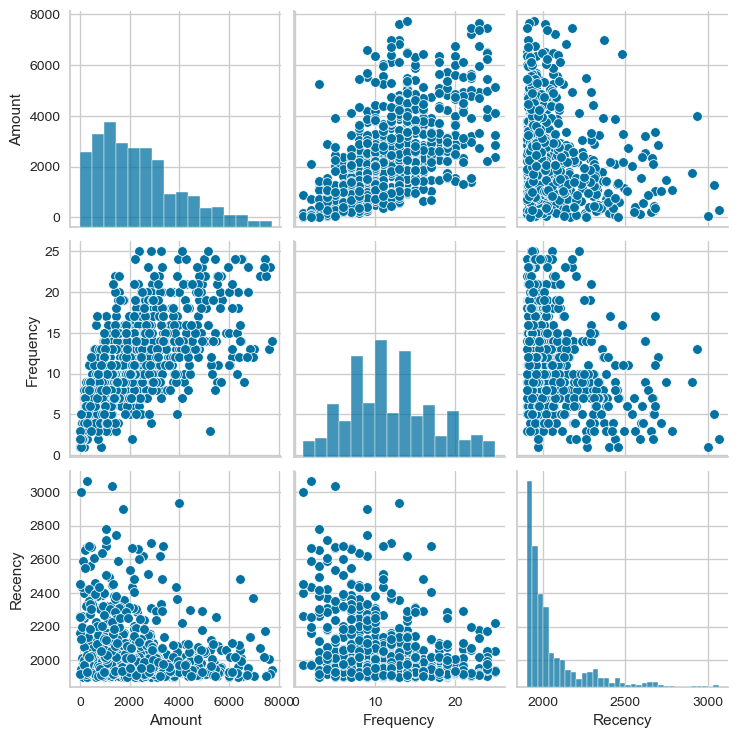

In [35]:
sns.pairplot(df12)
plt.show()

In [36]:
# Rescaling the attributes
df2 = df1[["Amount", "Frequency", "Recency"]]

# Instantiate
scaler = StandardScaler()

# fit_transform
df2_scaled = scaler.fit_transform(df2)
df2_scaled.shape

df2_scaled = pd.DataFrame(df2_scaled)
df2_scaled.columns = ['Amount', 'Frequency', 'Recency']
df2_scaled

,Amount,Frequency,Recency
0,1.894500,-0.141477,0.184455
1,-0.793645,0.612378,-0.691221
2,-0.355804,0.046987,0.582490
3,1.610234,1.177769,-0.500164
4,-0.895175,-1.083796,1.410402
...,...,...,...
725,-0.387960,-0.518404,4.515073
726,2.234742,1.177769,-0.643457
727,1.829366,-0.706868,-0.770828
728,2.584484,0.046987,-0.744292


## Finding the optimal number of clusters: the Elbow method and the Silhouette analysis
### the Elbow Method

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

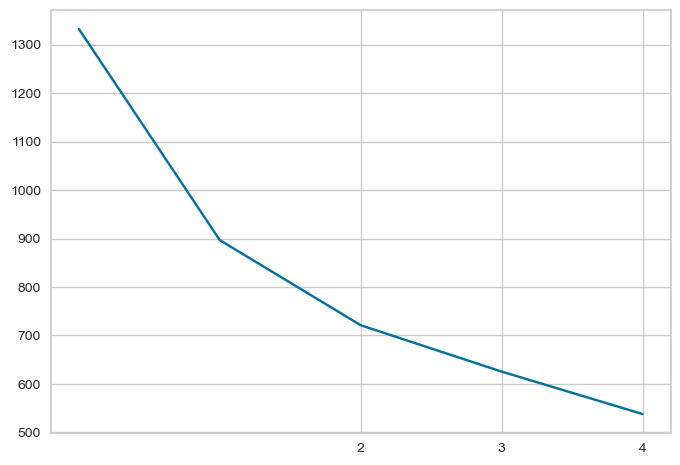

In [37]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.xticks([2,3,4,5,6])
plt.plot(ssd)

In [38]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df2_scaled[["Amount", "Frequency", "Recency"]])
    sse.append(km.inertia_)

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [39]:
sse

[2190.0,
 1332.4473077211305,
 896.6780964165523,
 720.9797280217597,
 624.6816393692433,
 539.1825648014504,
 465.53422592833454,
 421.3800986580486,
 379.9193622427279]

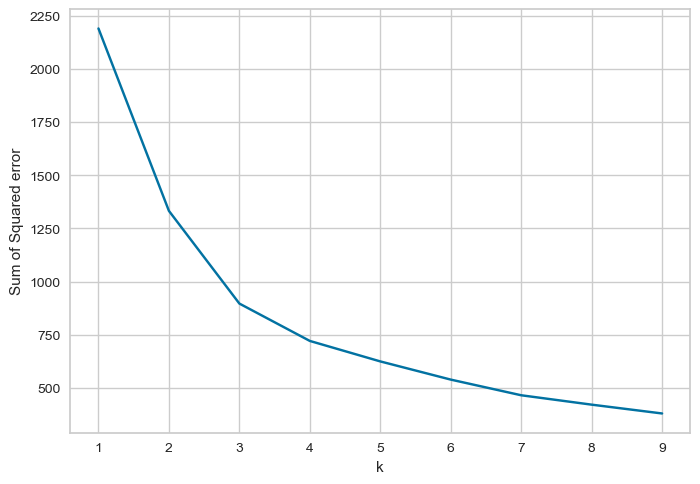

In [40]:
plt.xlabel("k")
plt.ylabel("Sum of Squared error")
plt.plot(k_rng, sse)

silhouetten analysis https://www.youtube.com/watch?v=zQfEc7vA1gU

In [41]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

# Silhouetten Analysis

In [42]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df2_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=2, the silhouette score is 0.3571772672916187


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=3, the silhouette score is 0.3796773789987821


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=4, the silhouette score is 0.33072612315856215


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=5, the silhouette score is 0.3428213711812697


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=6, the silhouette score is 0.33139241591927726


In [43]:
df2_scaled

,Amount,Frequency,Recency
0,1.894500,-0.141477,0.184455
1,-0.793645,0.612378,-0.691221
2,-0.355804,0.046987,0.582490
3,1.610234,1.177769,-0.500164
4,-0.895175,-1.083796,1.410402
...,...,...,...
725,-0.387960,-0.518404,4.515073
726,2.234742,1.177769,-0.643457
727,1.829366,-0.706868,-0.770828
728,2.584484,0.046987,-0.744292


visualize silhouetten analysis

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

In [45]:
X = df2_scaled.copy()
X.head()

,Amount,Frequency,Recency
0,1.894500,-0.141477,0.184455
1,-0.793645,0.612378,-0.691221
2,-0.355804,0.046987,0.582490
3,1.610234,1.177769,-0.500164
4,-0.895175,-1.083796,1.410402


In [46]:
SC = StandardScaler().fit(X)
X = pd.DataFrame(SC.transform(X),columns=X.columns)
X.head()

,Amount,Frequency,Recency
0,1.894500,-0.141477,0.184455
1,-0.793645,0.612378,-0.691221
2,-0.355804,0.046987,0.582490
3,1.610234,1.177769,-0.500164
4,-0.895175,-1.083796,1.410402


In [47]:
Kmeans = KMeans(random_state=0).fit(X)
print("Inertia of Kmeans with default 8 clusters:",Kmeans.inertia_)

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Inertia of Kmeans with default 8 clusters: 420.72075543870614


In [48]:
inertias = pd.DataFrame({"N_clusters":None,"Inertia":None},index=range(1))

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    inertias = inertias.append({"N_clusters":i,"Inertia":kmeans.inertia_},ignore_index=True)

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\satom\AppData\Local\Temp\ipykernel_3572\3129844467.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inertias = inertias.append({"N_clusters":i,"Inertia":kmeans.inertia_},ignore_index=True)
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

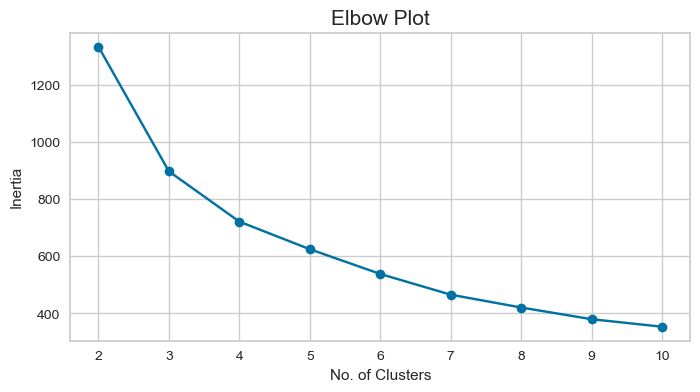

In [49]:
inertias.dropna(inplace=True)

plt.figure(figsize = (8,4))
plt.plot(inertias.N_clusters,inertias.Inertia,marker="o")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot",size=15)
plt.show()

In [50]:
inertias["Silhoutte_Score"] = None
scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    score = silhouette_score(X,kmeans.labels_)
    scores.append(score)
    
inertias["Silhoutte_Score"] = scores

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [51]:
inertias.sort_values("Silhoutte_Score",ascending=False)


,N_clusters,Inertia,Silhoutte_Score
2,3.0,896.689851,0.379677
1,2.0,1332.447308,0.357177
4,5.0,624.521972,0.342069
5,6.0,537.984713,0.331185
3,4.0,720.979728,0.329904
8,9.0,379.789370,0.310422
7,8.0,420.720755,0.309105
9,10.0,353.568946,0.307863
6,7.0,465.589179,0.304167


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


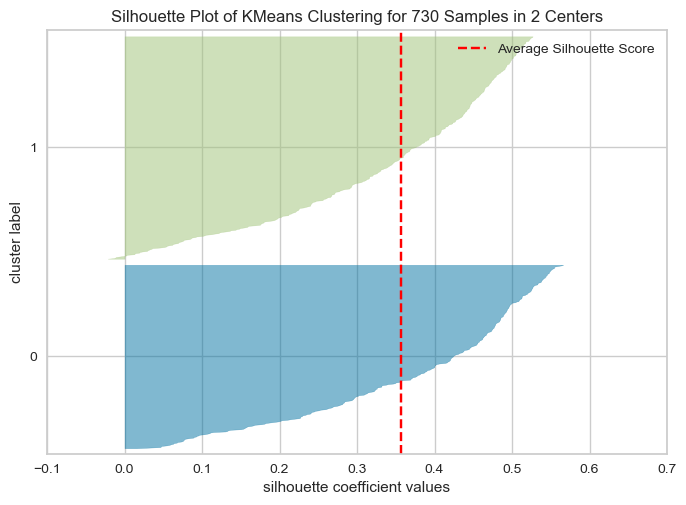

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


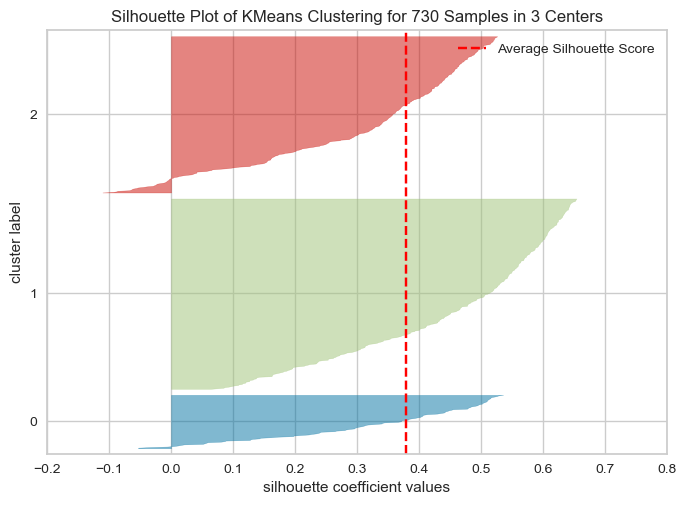

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


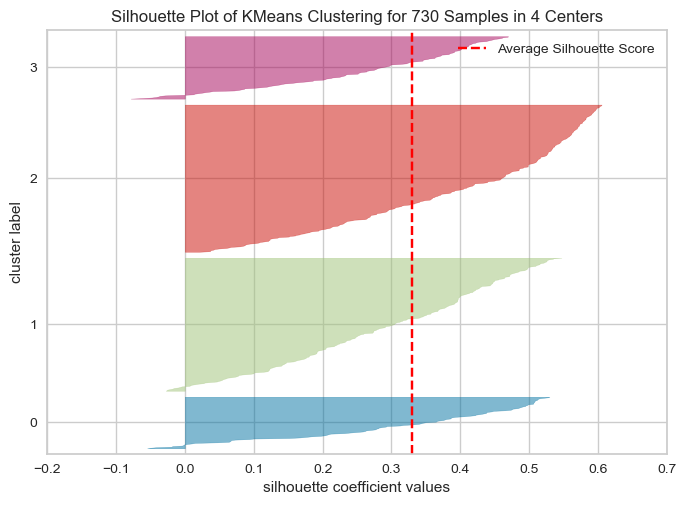

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


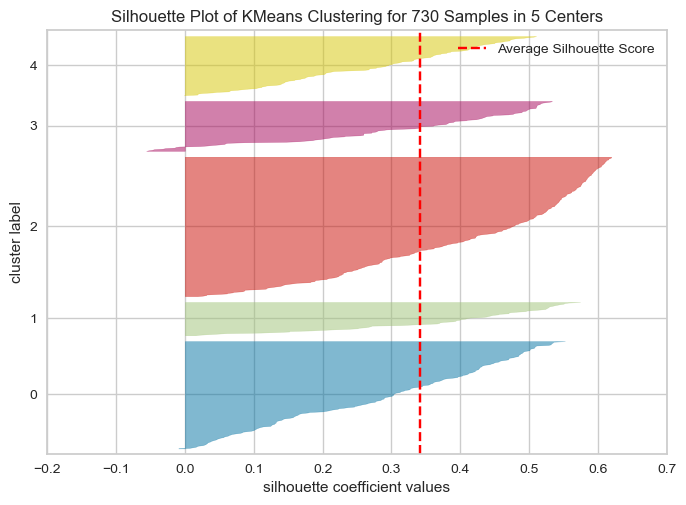

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


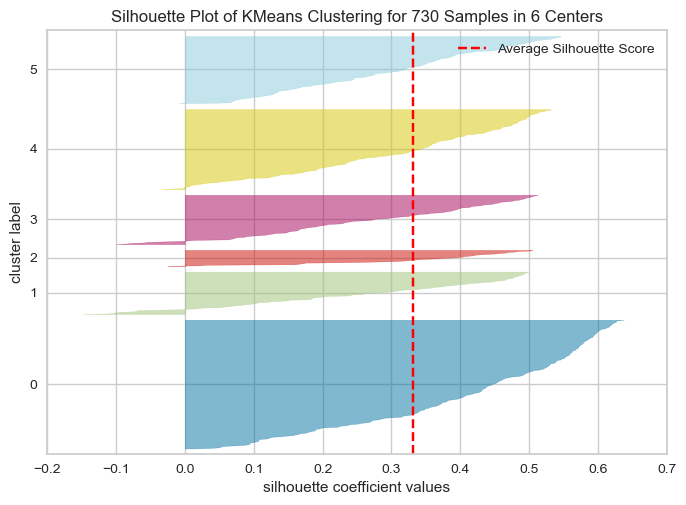

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


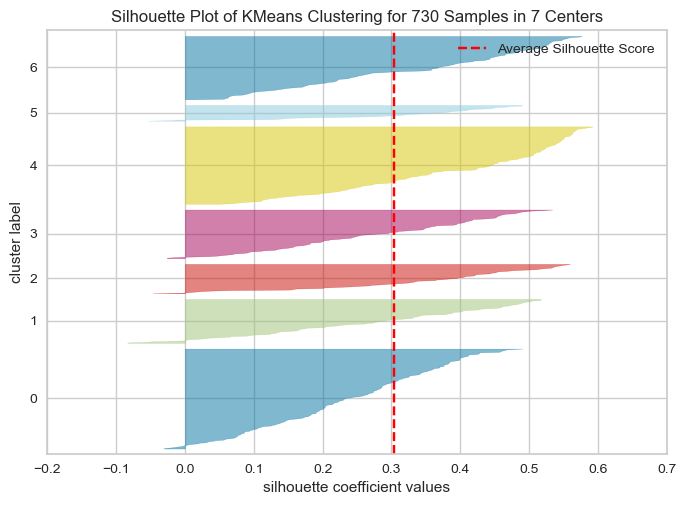

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


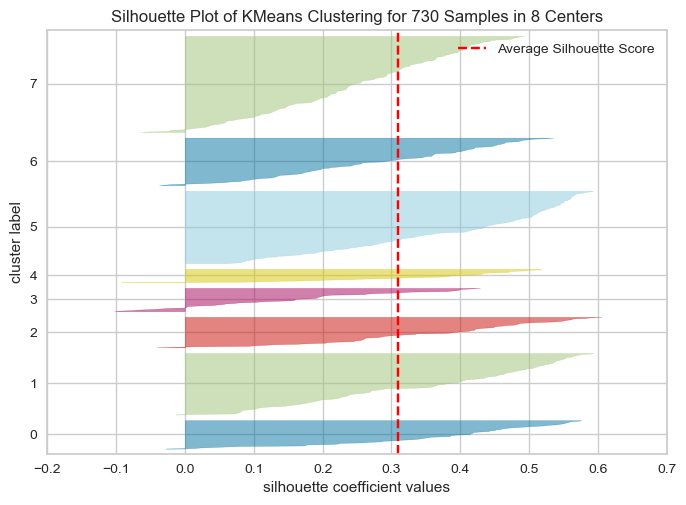

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


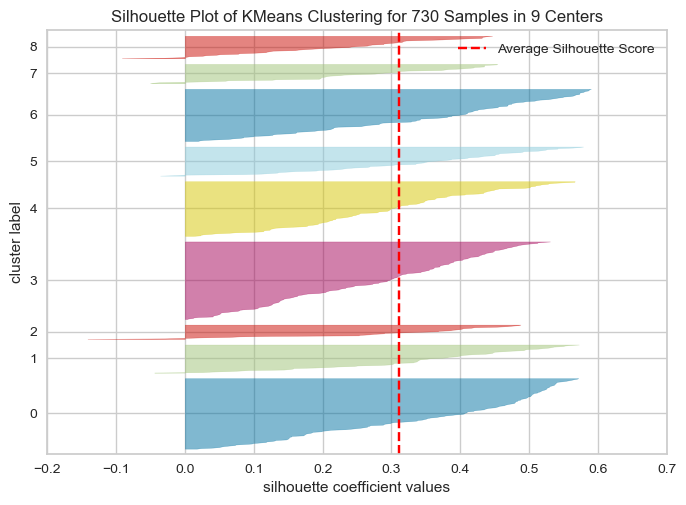

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


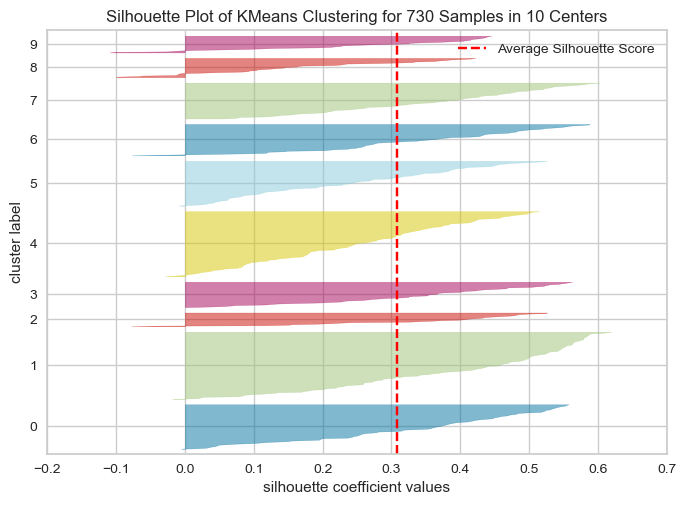

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()
    

In [53]:
kmeans = KMeans(n_clusters = 2).fit(X)
ypredicted =kmeans.fit_predict(X)
ypredicted


c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [54]:
X["Cluster"] = ypredicted

In [55]:
X

,Amount,Frequency,Recency,Cluster
0,1.894500,-0.141477,0.184455,0
1,-0.793645,0.612378,-0.691221,1
2,-0.355804,0.046987,0.582490,1
3,1.610234,1.177769,-0.500164,0
4,-0.895175,-1.083796,1.410402,1
...,...,...,...,...
725,-0.387960,-0.518404,4.515073,1
726,2.234742,1.177769,-0.643457,0
727,1.829366,-0.706868,-0.770828,0
728,2.584484,0.046987,-0.744292,0


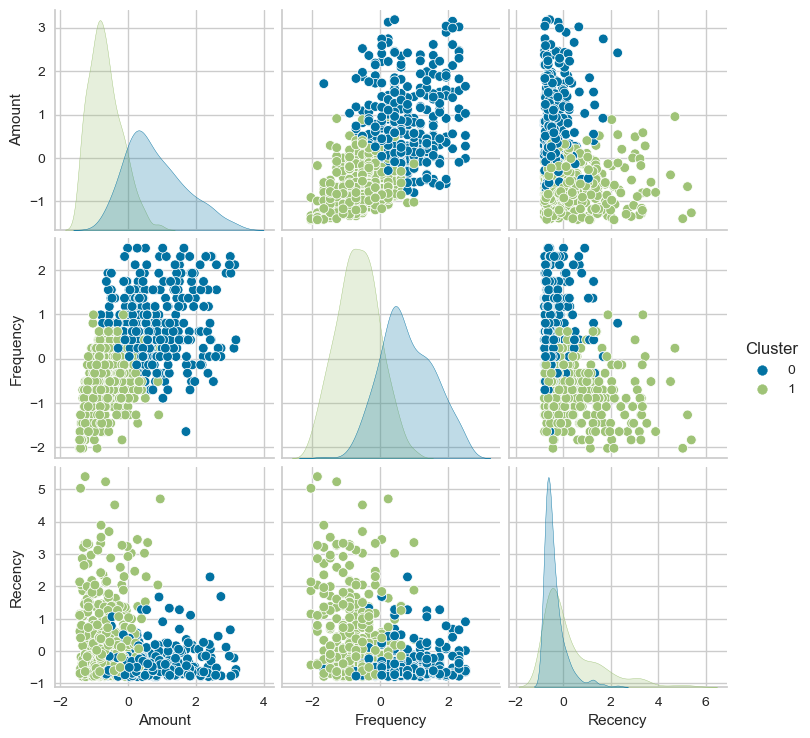

In [56]:
sns.pairplot(X, hue ="Cluster")
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 3).fit(X)
ypredicted3 =kmeans.fit_predict(X)
ypredicted3

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

array([0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1,
       0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1,
       0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0,

In [58]:
X["Cluster"] = ypredicted3
X

,Amount,Frequency,Recency,Cluster
0,1.894500,-0.141477,0.184455,0
1,-0.793645,0.612378,-0.691221,1
2,-0.355804,0.046987,0.582490,1
3,1.610234,1.177769,-0.500164,0
4,-0.895175,-1.083796,1.410402,2
...,...,...,...,...
725,-0.387960,-0.518404,4.515073,2
726,2.234742,1.177769,-0.643457,0
727,1.829366,-0.706868,-0.770828,0
728,2.584484,0.046987,-0.744292,0


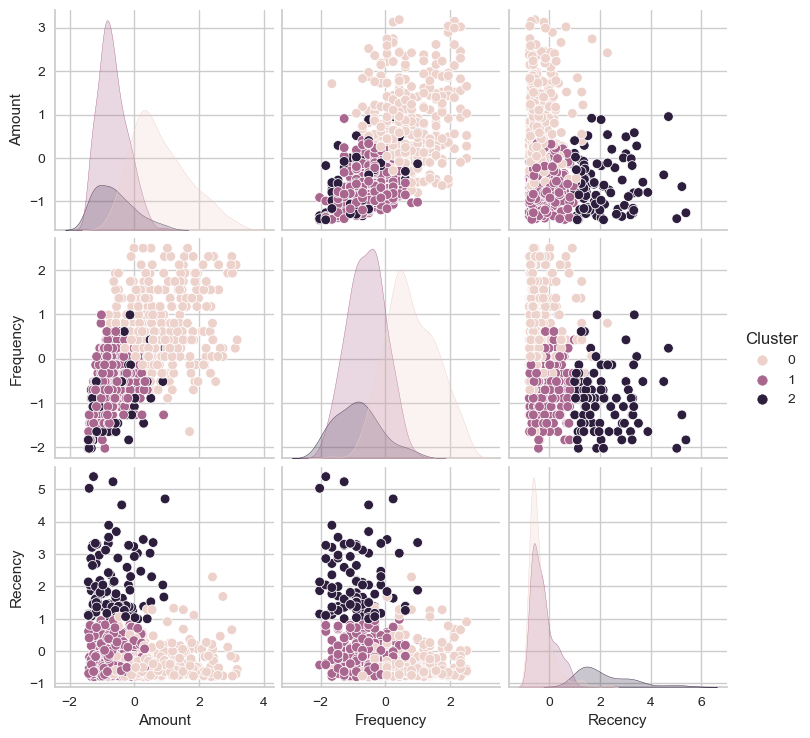

In [59]:
sns.pairplot(X, hue ="Cluster")
plt.show()

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

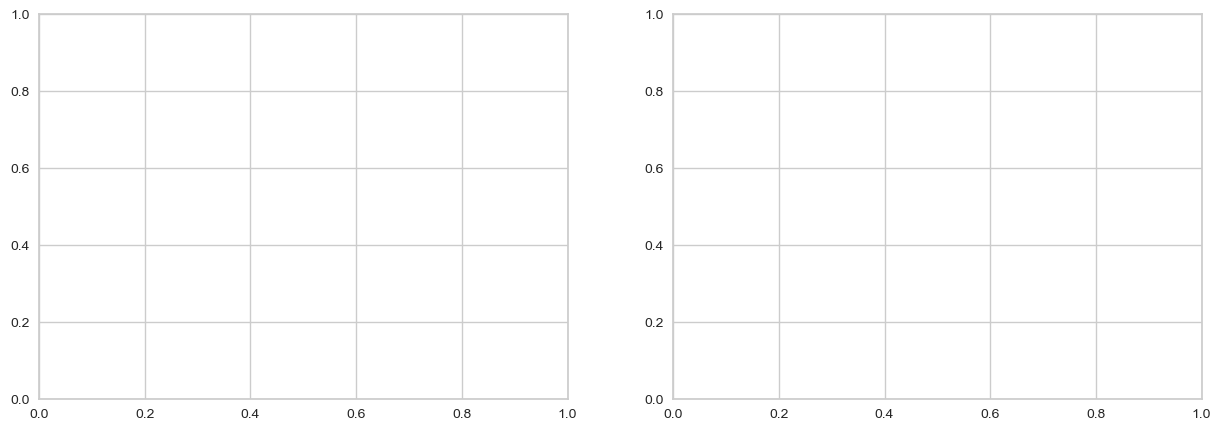

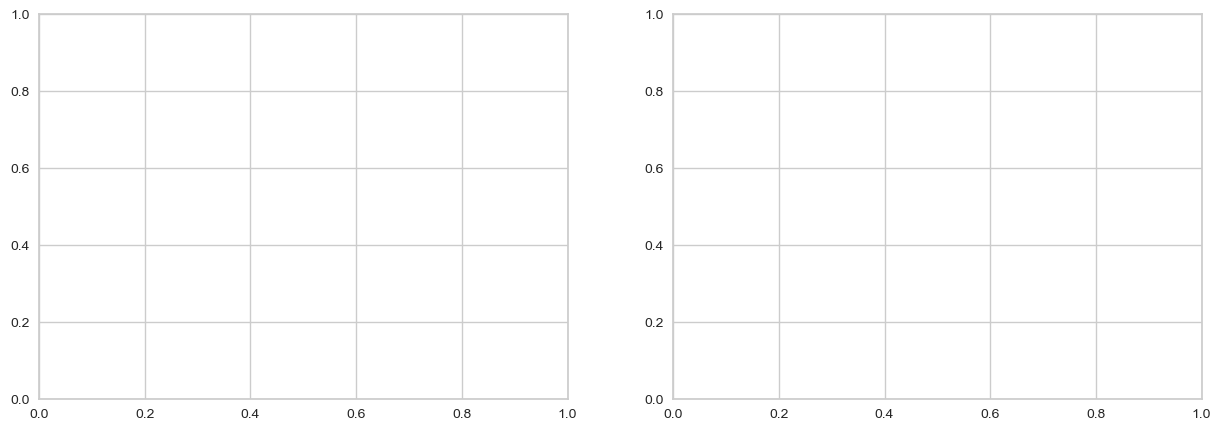

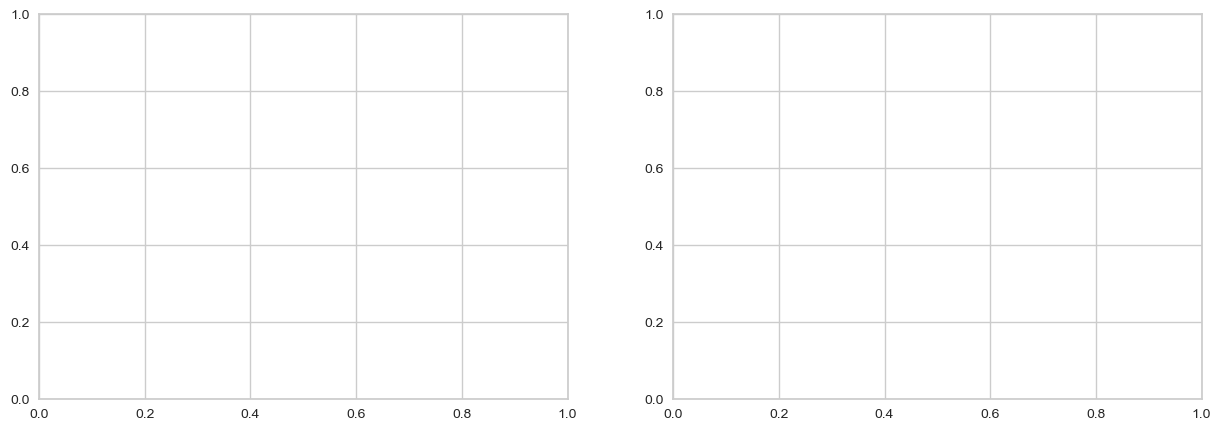

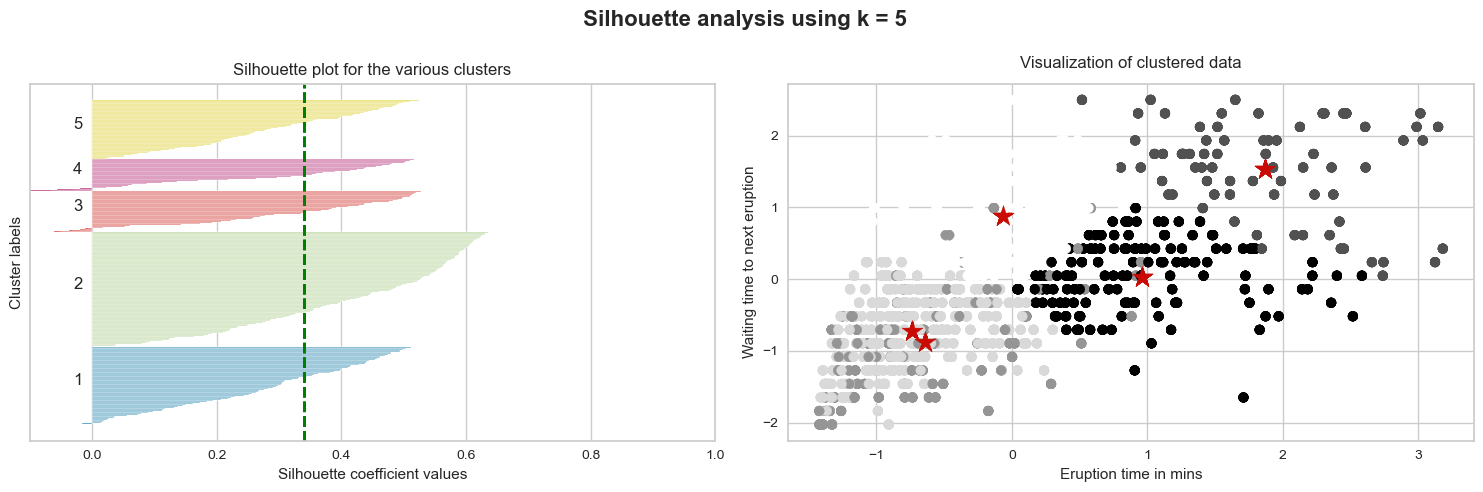

In [60]:

""" # load petal data
data = df2_scaled
# load into Dataframe 
df = pd.DataFrame(data.data,columns = data.feature_names)
print(df.shape)
df.head()
df2_scaled = df.drop(['sepal length (cm)', 'sepal width (cm)'],axis = 'columns')
df2_scaled.head()
# plot scatter plot 
plt.scatter(df2_scaled['petal length (cm)'],df2_scaled['petal width (cm)']) """
# Now check silhouette coefficient
for i,k in enumerate([2,3,4,5]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(df2_scaled)
    centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(df2_scaled,y_predict)
    #silhouette_vals
# silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
    cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
   
    ax[0].barh(range(y_lower,y_upper),
    cluster_silhouette_vals,height =1)
    ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)
        
    # Get the average silhouette score 
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score,linestyle ='--',
    linewidth =2,color = 'green')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title('Silhouette plot for the various clusters')
        
        
        # scatter plot of data colored with labels
        
    ax[1].scatter(df2_scaled['Amount'],
    df2_scaled['Frequency'] , c = y_predict)
    ax[1].scatter(centroids[:,0],centroids[:,1],
    marker = '*' , c= 'r',s =250)
    ax[1].set_xlabel('Eruption time in mins')
    ax[1].set_ylabel('Waiting time to next eruption')
    ax[1].set_title('Visualization of clustered data', y=1.02)
        
    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
    plt.savefig(f'Silhouette_analysis_{k}.jpg')

# k-means with some arbitrary k


In [61]:
df2_scaled

,Amount,Frequency,Recency
0,1.894500,-0.141477,0.184455
1,-0.793645,0.612378,-0.691221
2,-0.355804,0.046987,0.582490
3,1.610234,1.177769,-0.500164
4,-0.895175,-1.083796,1.410402
...,...,...,...
725,-0.387960,-0.518404,4.515073
726,2.234742,1.177769,-0.643457
727,1.829366,-0.706868,-0.770828
728,2.584484,0.046987,-0.744292


K=2 

In [62]:
# k = 2:
kmeans = KMeans(n_clusters = 2, max_iter = 50)
kmeans.fit(df2_scaled)
y_predicted = kmeans.fit_predict(df2_scaled)
y_predicted

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [63]:
y_predicted.shape

(730,)

In [64]:
df2_scaled.shape

(730, 3)

In [65]:
df1.shape

(730, 4)

In [66]:
df2_scaled["Cluster"] = y_predicted
df2_scaled

,Amount,Frequency,Recency,Cluster
0,1.894500,-0.141477,0.184455,0
1,-0.793645,0.612378,-0.691221,1
2,-0.355804,0.046987,0.582490,1
3,1.610234,1.177769,-0.500164,0
4,-0.895175,-1.083796,1.410402,1
...,...,...,...,...
725,-0.387960,-0.518404,4.515073,1
726,2.234742,1.177769,-0.643457,0
727,1.829366,-0.706868,-0.770828,0
728,2.584484,0.046987,-0.744292,0


In [67]:
df1["ClusterID"] = y_predicted
df1

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\320560632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ClusterID"] = y_predicted


,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2085,0
1,AA-10375,1056.390,15,1920,1
2,AA-10480,1790.512,12,2160,1
3,AA-10645,5086.935,18,1956,0
4,AB-10015,886.156,6,2316,1
...,...,...,...,...,...
785,VT-21700,1736.596,9,2901,1
786,VW-21775,6134.038,18,1929,0
789,YC-21895,5454.350,8,1905,0
790,YS-21880,6720.444,12,1910,0


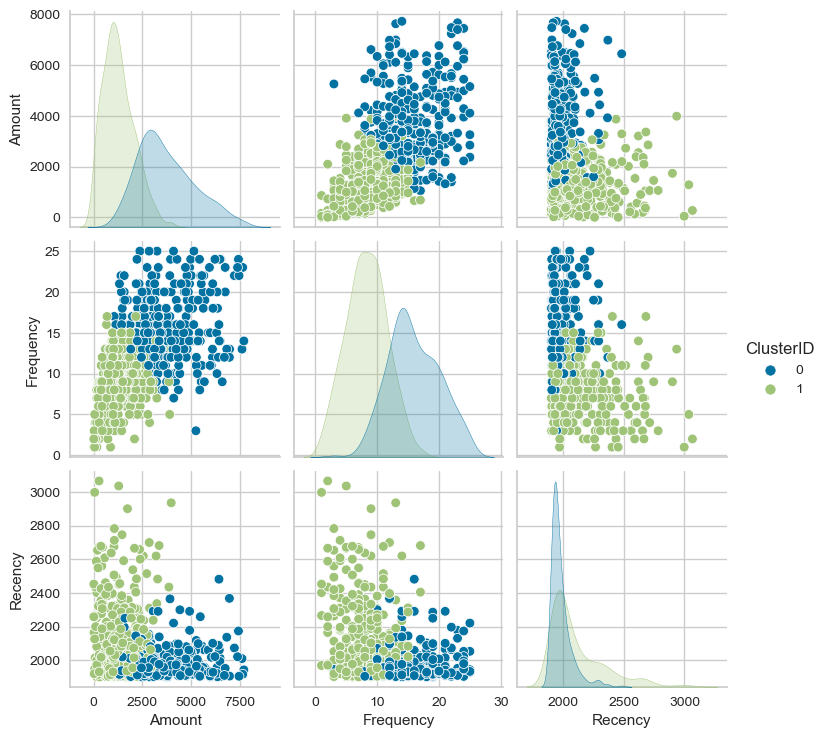

In [68]:
sns.pairplot(df1, hue = "ClusterID")

In [69]:
df2_scaled

,Amount,Frequency,Recency,Cluster
0,1.894500,-0.141477,0.184455,0
1,-0.793645,0.612378,-0.691221,1
2,-0.355804,0.046987,0.582490,1
3,1.610234,1.177769,-0.500164,0
4,-0.895175,-1.083796,1.410402,1
...,...,...,...,...
725,-0.387960,-0.518404,4.515073,1
726,2.234742,1.177769,-0.643457,0
727,1.829366,-0.706868,-0.770828,0
728,2.584484,0.046987,-0.744292,0


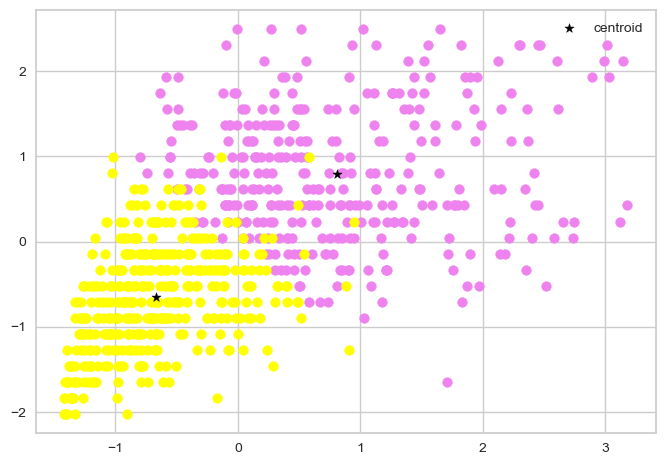

In [70]:
df2_scaled1 = df2_scaled[df2_scaled.Cluster == 0]
df2_scaled2 = df2_scaled[df2_scaled.Cluster == 1]
plt.scatter(df2_scaled1.Amount, df2_scaled1.Frequency, color = "violet")
plt.scatter(df2_scaled2.Amount, df2_scaled2.Frequency, color = "yellow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black", marker = "*", label = "centroid")
plt.legend()

In [71]:
kmeans.cluster_centers_

array([[ 0.80699253,  0.79341744, -0.37837365],
       [-0.66576884, -0.65456939,  0.31215826]])

In [72]:
df1["ClusterID"] = y_predicted
df1

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\320560632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ClusterID"] = y_predicted


,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2085,0
1,AA-10375,1056.390,15,1920,1
2,AA-10480,1790.512,12,2160,1
3,AA-10645,5086.935,18,1956,0
4,AB-10015,886.156,6,2316,1
...,...,...,...,...,...
785,VT-21700,1736.596,9,2901,1
786,VW-21775,6134.038,18,1929,0
789,YC-21895,5454.350,8,1905,0
790,YS-21880,6720.444,12,1910,0


In [73]:
# Assign the labels to each data point, and execute the following script.
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

[(0, 330), (1, 400)]

In [74]:
label_list

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

Now I use 3 as the amount of cluster. I create plots to see the features of each cluster group

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\194243711.py:11: UserWarning: Legend does not support handles for AxesSubplot instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(handles = [ax, ax2], loc = "upper center")


<Figure size 1200x800 with 0 Axes>

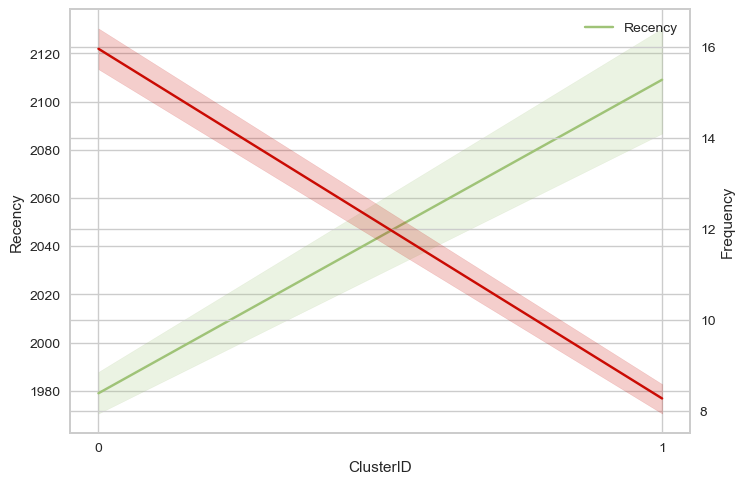

In [75]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()

ax = sns.lineplot(x = df1["ClusterID"], y = df1["Recency"], color = "g", label = "Recency")

ax2 = ax.twinx()
ax2 = sns.lineplot(x = df1["ClusterID"], y =df1["Frequency"], color= "r", label = "Frequency")


#sns.lineplot(x =df1["ClusterID"], y = df1["Frequency"], color = "b", label = "Frequency")
plt.legend(handles = [ax, ax2], loc = "upper center")
plt.xticks([0,1])
plt.show()

<Figure size 1200x800 with 0 Axes>

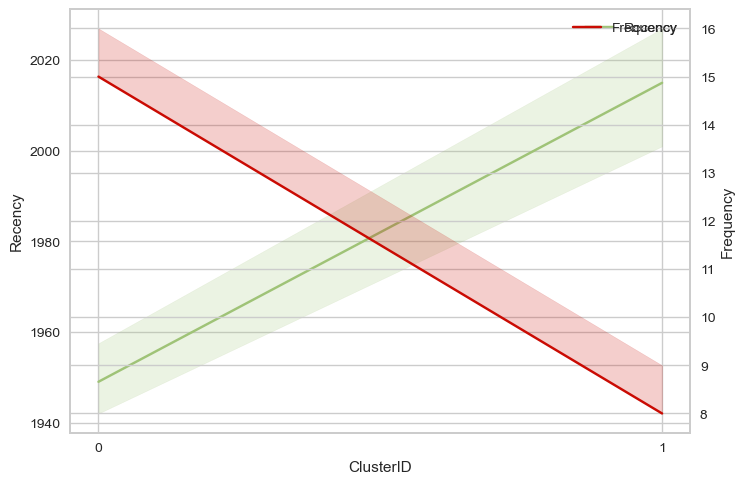

In [76]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()

ax = sns.lineplot(x = df1["ClusterID"], y = df1["Recency"], estimator = "median", color = "g", label = "Recency")

ax2 = ax.twinx()
ax2 = sns.lineplot(x = df1["ClusterID"], y =df1["Frequency"], estimator = "median", color= "r", label = "Frequency")


#sns.lineplot(x =df1["ClusterID"], y = df1["Frequency"], color = "b", label = "Frequency")
plt.legend()
plt.xticks([0,1])
plt.show()

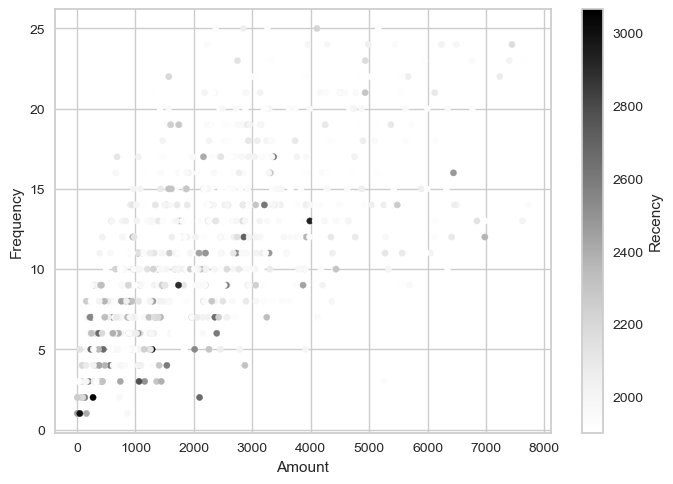

In [77]:
ax = df1.plot.scatter(x='Amount',
                      y='Frequency',
                      c='Recency')

In [78]:
import plotly.express as px
fig = px.scatter_3d(df1, x='Amount', y='Frequency', z='Recency', color = "ClusterID")
fig.show()

In [79]:
df1

,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2085,0
1,AA-10375,1056.390,15,1920,1
2,AA-10480,1790.512,12,2160,1
3,AA-10645,5086.935,18,1956,0
4,AB-10015,886.156,6,2316,1
...,...,...,...,...,...
785,VT-21700,1736.596,9,2901,1
786,VW-21775,6134.038,18,1929,0
789,YC-21895,5454.350,8,1905,0
790,YS-21880,6720.444,12,1910,0


In [80]:
df_summary = round(df1.groupby(['ClusterID']).mean(),0).astype(int)
df_summary

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\1401051517.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Amount,Frequency,Recency
ClusterID,,,
0,3740,16,1979
1,1271,8,2109


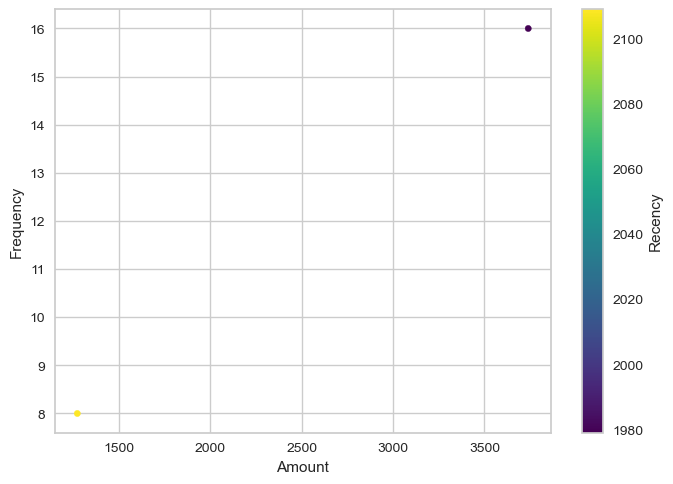

In [81]:
ax = df_summary.plot.scatter(x = "Amount",
                             y = "Frequency",
                             c = "Recency",
                             colormap ="viridis")
plt.show()

K = 3

In [82]:
# k = 2:
kmeans3 = KMeans(n_clusters = 3, max_iter = 50)
kmeans3.fit(df2_scaled)
y_predicted3 = kmeans3.fit_predict(df2_scaled)
y_predicted3

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\satom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



array([1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0,
       1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1,

In [86]:
y_predicted3.shape

(730,)

In [87]:
df2_scaled["Cluster"] = y_predicted3
df2_scaled

,Amount,Frequency,Recency,Cluster
0,1.894500,-0.141477,0.184455,1
1,-0.793645,0.612378,-0.691221,0
2,-0.355804,0.046987,0.582490,0
3,1.610234,1.177769,-0.500164,1
4,-0.895175,-1.083796,1.410402,2
...,...,...,...,...
725,-0.387960,-0.518404,4.515073,2
726,2.234742,1.177769,-0.643457,1
727,1.829366,-0.706868,-0.770828,1
728,2.584484,0.046987,-0.744292,1


In [88]:
df1["Cluster"] = y_predicted3
df1

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\1965763390.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Amount,Frequency,Recency,ClusterID,Cluster
0,AA-10315,5563.560,11,2085,0,1
1,AA-10375,1056.390,15,1920,1,0
2,AA-10480,1790.512,12,2160,1,0
3,AA-10645,5086.935,18,1956,0,1
4,AB-10015,886.156,6,2316,1,2
...,...,...,...,...,...,...
785,VT-21700,1736.596,9,2901,1,2
786,VW-21775,6134.038,18,1929,0,1
789,YC-21895,5454.350,8,1905,0,1
790,YS-21880,6720.444,12,1910,0,1


In [89]:
df1 = df1.drop(["ClusterID"], axis = 1)
df1

,CustomerID,Amount,Frequency,Recency,Cluster
0,AA-10315,5563.560,11,2085,1
1,AA-10375,1056.390,15,1920,0
2,AA-10480,1790.512,12,2160,0
3,AA-10645,5086.935,18,1956,1
4,AB-10015,886.156,6,2316,2
...,...,...,...,...,...
785,VT-21700,1736.596,9,2901,2
786,VW-21775,6134.038,18,1929,1
789,YC-21895,5454.350,8,1905,1
790,YS-21880,6720.444,12,1910,1


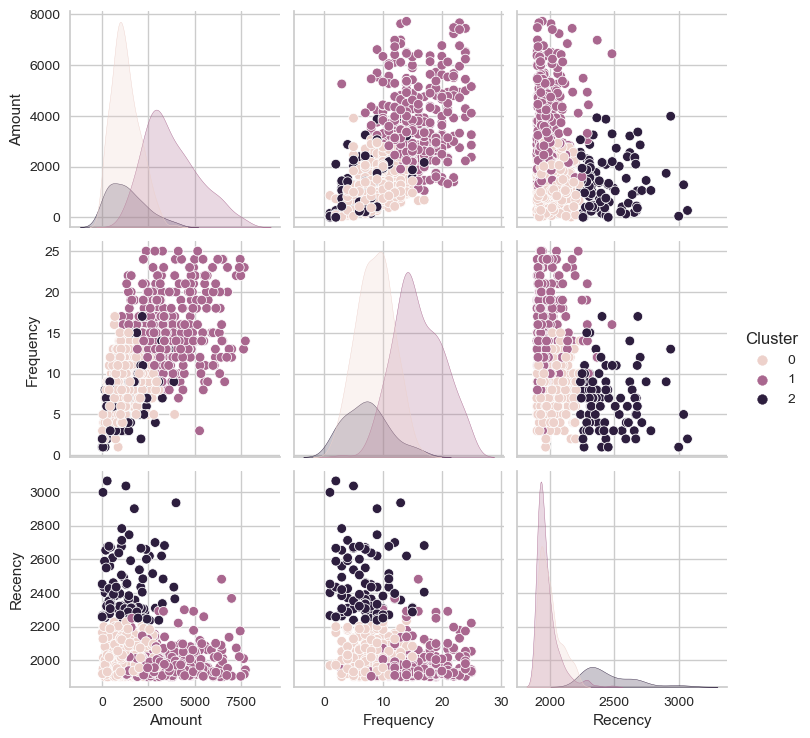

In [90]:
sns.pairplot(df1, hue = "Cluster")

In [91]:
df2_scaled

,Amount,Frequency,Recency,Cluster
0,1.894500,-0.141477,0.184455,1
1,-0.793645,0.612378,-0.691221,0
2,-0.355804,0.046987,0.582490,0
3,1.610234,1.177769,-0.500164,1
4,-0.895175,-1.083796,1.410402,2
...,...,...,...,...
725,-0.387960,-0.518404,4.515073,2
726,2.234742,1.177769,-0.643457,1
727,1.829366,-0.706868,-0.770828,1
728,2.584484,0.046987,-0.744292,1


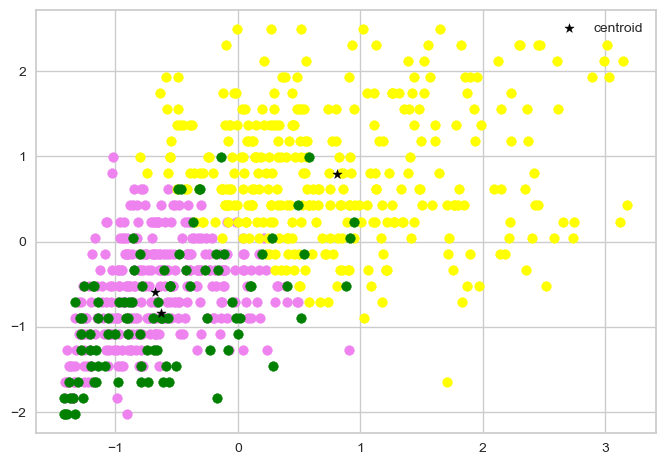

In [95]:
df2_scaled1 = df2_scaled[df2_scaled.Cluster == 0]
df2_scaled2 = df2_scaled[df2_scaled.Cluster == 1]
df2_scaled3 = df2_scaled[df2_scaled.Cluster == 2]

plt.scatter(df2_scaled1.Amount, df2_scaled1.Frequency, color = "violet")
plt.scatter(df2_scaled2.Amount, df2_scaled2.Frequency, color = "yellow")
plt.scatter(df2_scaled3.Amount, df2_scaled3.Frequency, color = "green")

plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], color = "black", marker = "*", label = "centroid")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


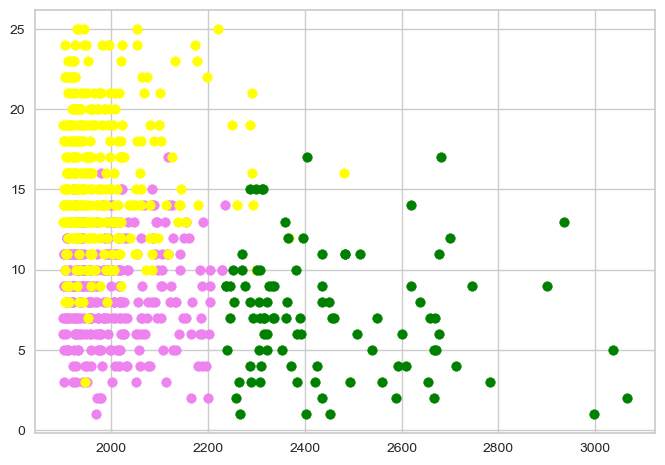

In [105]:
df11 = df1[df1.Cluster == 0]
df12 = df1[df1.Cluster == 1]
df13 = df1[df1.Cluster == 2]

plt.scatter(df11.Recency, df11.Frequency, color = "violet")
plt.scatter(df12.Recency, df12.Frequency, color = "yellow")
plt.scatter(df13.Recency, df13.Frequency, color = "green")

#plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], color = "black", marker = "*", label = "centroid")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


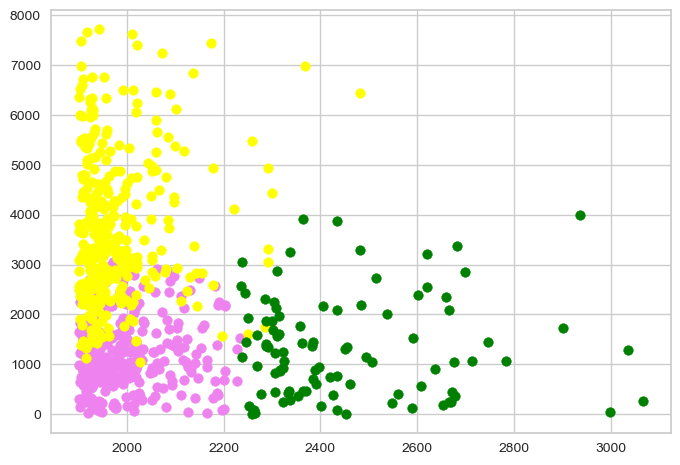

In [104]:
df11 = df1[df1.Cluster == 0]
df12 = df1[df1.Cluster == 1]
df13 = df1[df1.Cluster == 2]

plt.scatter(df11.Recency, df11.Amount, color = "violet")
plt.scatter(df12.Recency, df12.Amount, color = "yellow")
plt.scatter(df13.Recency, df13.Amount, color = "green")

#plt.scatter(kmeans3.cluster_centers_[:,1], kmeans3.cluster_centers_[:,0], color = "black", marker = "*", label = "centroid")
plt.legend()

In [106]:
import plotly.express as px
fig = px.scatter_3d(df1, x='Amount', y='Frequency', z='Recency', color = "Cluster")
fig.show()

In [107]:
df_summary3 = round(df1.groupby(['Cluster']).mean(),0).astype(int)
df_summary3

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\2277423578.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Amount,Frequency,Recency
Cluster,,,
0,1258,9,2002
1,3740,16,1978
2,1339,7,2452


# Train the model

In [83]:
df1

,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2085,0
1,AA-10375,1056.390,15,1920,1
2,AA-10480,1790.512,12,2160,1
3,AA-10645,5086.935,18,1956,0
4,AB-10015,886.156,6,2316,1
...,...,...,...,...,...
785,VT-21700,1736.596,9,2901,1
786,VW-21775,6134.038,18,1929,0
789,YC-21895,5454.350,8,1905,0
790,YS-21880,6720.444,12,1910,0


In [84]:
#assign the label
df1["ClusterID"] = kmeans.labels_
df1.head()

C:\Users\satom\AppData\Local\Temp\ipykernel_3572\3219996450.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Amount,Frequency,Recency,ClusterID
0,AA-10315,5563.560,11,2085,0
1,AA-10375,1056.390,15,1920,1
2,AA-10480,1790.512,12,2160,1
3,AA-10645,5086.935,18,1956,0
4,AB-10015,886.156,6,2316,1


In [85]:
clusterer = KMeans(n_clusters=3, n_init="auto", random_state=0)

centers = clusterer.cluster_centers_
centers

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

<AxesSubplot: xlabel='ClusterID', ylabel='Amount'>

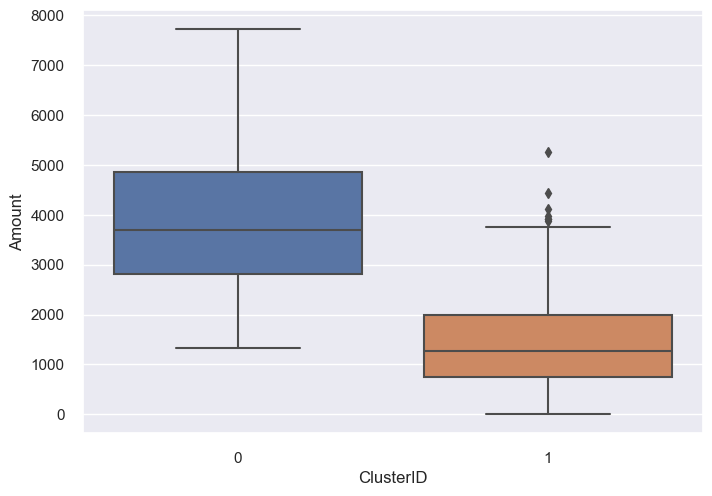

In [ ]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='ClusterID', y='Amount', data=df1)

<AxesSubplot: xlabel='ClusterID', ylabel='Frequency'>

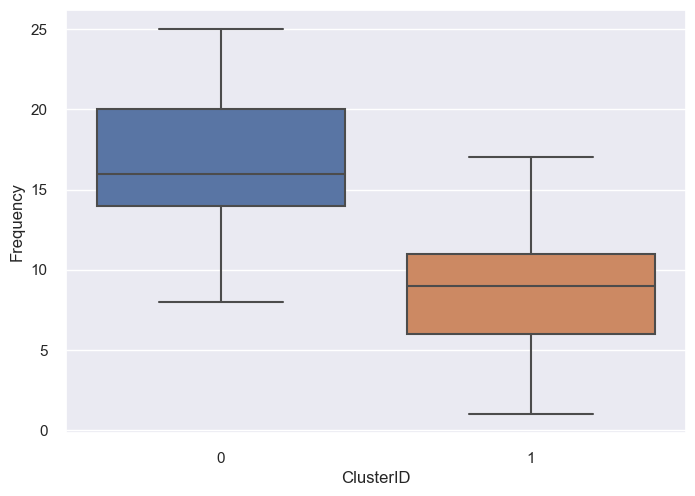

In [ ]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='ClusterID', y='Frequency', data=df1)

<AxesSubplot: xlabel='ClusterID', ylabel='Recency'>

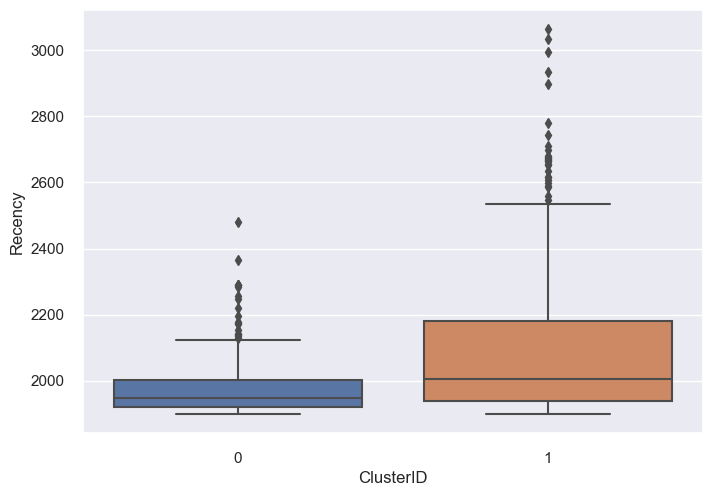

In [ ]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='ClusterID', y='Recency', data=df1)

■Recency（リセンシー）：最新購買日
最近購入した顧客のほうが何年も前に購入した顧客よりよい顧客と考えます。購入データのなかから「購入日時」を見て、 その顧客が最後に買ったのがいつかを算出しグループ化します。グループ化は、どの程度の期間で分けるのがよいかは、 そのグループに所属する顧客数やどれくらいまで前のデータを分析するかの意味を勘案して決定します。
■Frequency（フリークエンシー）：購買頻度
どの程度頻繁に購入してくれたかを判断材料とするもので、頻度が高いほどよい顧客と考えます。 顧客の購買履歴から過去に何回購買したかを拾い出し、その回数が多い順番に並べれば、一番上にくる顧客が最もFの高い顧客となります。 Fが低い顧客が多い場合は、サービス業の場合サービスレベルや料金等で顧客に満足を与えていない可能性があります。 一方、Fが高い顧客が多い場合 は、常連顧客が多いということですが、そのわりにFの低い顧客が少ない場合は、 新規の顧客が少ないことになりますので新規顧客獲得に向けた施策が必要に なってきます。
■Monetary（マネタリー）：購買金額
顧客の購入金額の合計で、この金額が大きいほど良い顧客と考えます。 このMを10段階に分けたものが前項で説明したデシル分析です。購買履歴から顧客ごとの購入金額の合計を計算し、それを金額の大きい順番に並べれば、 最も上にくる顧客がたくさん買う確率の高い顧客となるわけです。MもFと同様に企業の営業期間によって金額は大きくなってきます 。

RFM分析については、以下のような一般的解釈がされます。

Rが高い顧客ほど将来の収益に貢献する可能性が高い
Rが低ければFやMが高くても他社に奪われ離反している可能性が高い
Rが同じならFが高いほど常連客になっている
Rが同じならFやMが高いほど購買力がある顧客
RやFが高くてもMが少ない顧客は購買力が低い
Fが低くMが高い顧客はRの高い方が良い顧客
Fが上がらないか下がっている顧客は他社に奪われている可能性が高い
RFMすべてが低い顧客は切り捨てることも検討

https://www.actioniq.com/blog/what-is-rfm-analysis/#:~:text=The%20%E2%80%9CRFM%E2%80%9D%20in%20RFM%20analysis,has%20transacted%20with%20a%20brand
